In [34]:
# Definition of cubic polynomial fit for wavelength solution

In [2]:
# Eqn. (7) in Brandt+ 2017 JATIS is only appropriate for grid of spectra

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
# fake spectrum
stem_spec = '/Users/bandari/Documents/git.repos/rrlfe/src/model_spectra/rrmods_all/original_ascii_files'
spec_fake = pd.read_csv(stem_spec + '/700020m30.smo', delim_whitespace=True, names=['wavel','flux','noise'])

In [3]:
# for a given wavelength, these are the coordinates of the pixels and lenslets

N_data_pts = 100

input_wavel = np.linspace(3900.,5299.,num=N_data_pts)

# pixel x values
input_x_coords = np.linspace(0.,1000.,num=N_data_pts)
# pixel y values
input_y_coords = np.linspace(30.,20.,num=N_data_pts)

# lenslet/channel coords
channel_i_coords = np.arange(0,N_data_pts)
channel_j_coords = np.arange(0,N_data_pts)

In [4]:
xy_coords = (input_x_coords.flatten(),input_y_coords.flatten())
channel_coords = (channel_i_coords,channel_j_coords)

In [5]:
# simple linear fit 

def func(x, coeff_0, coeff_1):
    
    return coeff_0*x + coeff_1

In [6]:
# do the fit

p0 = 1.+np.ones((N_data_pts))
popt_x, pcov_x = curve_fit(func, xdata=channel_coords[1], ydata=xy_coords[0], p0=np.array([-0.1,30]))
popt_y, pcov_y = curve_fit(func, xdata=channel_coords[1], ydata=xy_coords[1], p0=np.array([10,0]))

In [8]:
# best-fit x,y

j_vals = channel_coords[1]
x_best = popt_x[0]*j_vals + popt_x[1]
y_best = popt_y[0]*j_vals + popt_y[1]

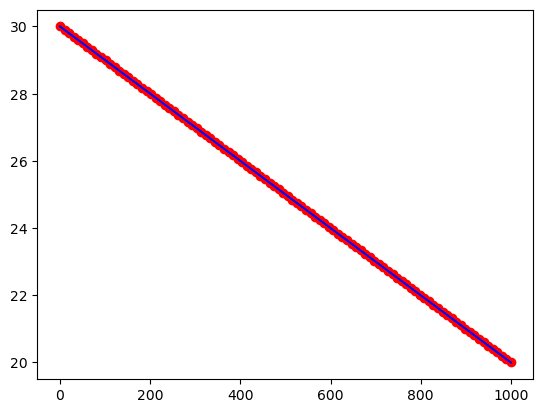

In [9]:
#plt.scatter(channel_coords[1], xy_coords[0])
plt.scatter(x_best,y_best,color='red')
plt.plot(input_x_coords,input_y_coords,color='blue')
plt.show()